<a href="https://colab.research.google.com/github/abstractguy/crypto_bot/blob/master/crypto_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cryptocurrency trading bot.

Hardcoded parameters.

In [0]:
symbol = 'ETH-BTC'
period = '60m'
interval = '1m'

Installs.

In [2]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


Library imports.

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import yfinance as yf

Function definitions.

In [0]:
def fill_NANs(dataframe):
    dataframe = dataframe.replace([-np.inf, np.inf], np.nan)
    dataframe.iloc[0] = dataframe.iloc[1]
    return dataframe.fillna(axis='index', method='pad')

def heikin_ashi(df):
    heikin_ashi_df = pd.DataFrame(index=df.index.values, columns=['Open', 'High', 'Low', 'Close'])
    heikin_ashi_df['Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

    for i in range(len(df)):
        if i == 0:
            heikin_ashi_df.iat[0, 0] = df['Open'].iloc[0]
        else:
            heikin_ashi_df.iat[i, 0] = (heikin_ashi_df.iat[i - 1, 0] + heikin_ashi_df.iat[i - 1, 3]) / 2

    heikin_ashi_df['High'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['High']).max(axis=1)
    heikin_ashi_df['Low'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['Low']).min(axis=1)

    return heikin_ashi_df

Download cryptocurrency symbol data.

In [5]:
dataset_downloaded = yf.download(tickers=[symbol], 
                                 period=period, 
                                 interval=interval, 
                                 group_by='ticker', 
                                 auto_adjust=True, 
                                 prepost=True)

dataset_downloaded = fill_NANs(dataset_downloaded)
dataset_downloaded

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-03-16 04:26:00+00:00,0.023190,0.023190,0.023190,0.023190,212.0
2020-03-16 04:27:00+00:00,0.023190,0.023190,0.023190,0.023190,212.0
2020-03-16 04:28:00+00:00,0.023228,0.023228,0.023228,0.023228,4188.0
2020-03-16 04:29:00+00:00,0.023205,0.023205,0.023205,0.023205,0.0
2020-03-16 04:30:00+00:00,0.023184,0.023184,0.023184,0.023184,0.0
2020-03-16 04:31:00+00:00,0.023184,0.023184,0.023184,0.023184,0.0
2020-03-16 04:32:00+00:00,0.023172,0.023172,0.023172,0.023172,284.0
2020-03-16 04:33:00+00:00,0.023203,0.023203,0.023203,0.023203,4260.0
2020-03-16 04:34:00+00:00,0.023189,0.023189,0.023189,0.023189,0.0


Download testing area -->

<-- End of download testing area.

*** To avoid downloading multiple times, restart here. ***

In [6]:
dataset = dataset_downloaded.copy()
dataset

,Open,High,Low,Close,Volume
Datetime,,,,,
2020-03-16 04:26:00+00:00,0.023190,0.023190,0.023190,0.023190,212.0
2020-03-16 04:27:00+00:00,0.023190,0.023190,0.023190,0.023190,212.0
2020-03-16 04:28:00+00:00,0.023228,0.023228,0.023228,0.023228,4188.0
2020-03-16 04:29:00+00:00,0.023205,0.023205,0.023205,0.023205,0.0
2020-03-16 04:30:00+00:00,0.023184,0.023184,0.023184,0.023184,0.0
2020-03-16 04:31:00+00:00,0.023184,0.023184,0.023184,0.023184,0.0
2020-03-16 04:32:00+00:00,0.023172,0.023172,0.023172,0.023172,284.0
2020-03-16 04:33:00+00:00,0.023203,0.023203,0.023203,0.023203,4260.0
2020-03-16 04:34:00+00:00,0.023189,0.023189,0.023189,0.023189,0.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close
2020-03-16 04:26:00,0.0231904,0.023190,0.023190,0.023190
2020-03-16 04:27:00,0.0231904,0.023190,0.023190,0.023190
2020-03-16 04:28:00,0.0231904,0.023228,0.023190,0.023228
2020-03-16 04:29:00,0.0232091,0.023209,0.023205,0.023205
2020-03-16 04:30:00,0.0232072,0.023207,0.023184,0.023184
2020-03-16 04:31:00,0.0231957,0.023196,0.023184,0.023184
2020-03-16 04:32:00,0.0231901,0.023190,0.023172,0.023172
2020-03-16 04:33:00,0.0231809,0.023203,0.023181,0.023203
2020-03-16 04:34:00,0.023192,0.023192,0.023189,0.023189
2020-03-16 04:35:00,0.0231907,0.023191,0.023175,0.023175


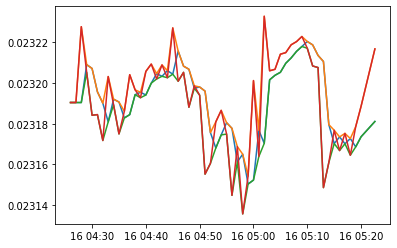

In [7]:
dataset = dataset.tz_localize(tz=None, ambiguous='infer')
heikin_ashi_dataset = heikin_ashi(dataset)
plt.plot(heikin_ashi_dataset)
heikin_ashi_dataset